In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [5]:
df = pd.read_csv('beauty(in).csv')
df.head()


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [37]:
if 'looks' in df.columns:
    df = df.drop(columns='looks')



In [39]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,cluster
0,5.73,30,0,1,0,1,1,1,14,0
1,4.28,28,0,1,0,1,1,0,12,0
2,7.96,35,0,1,0,1,0,0,10,0
3,11.57,38,0,1,0,0,1,1,16,2
4,11.42,27,0,1,0,0,1,0,16,1


In [41]:
print(df.isnull().sum())
df = df.dropna()  

wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
cluster     0
dtype: int64


In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)
df['cluster'].value_counts()  
print(df['cluster'].value_counts())

cluster
1    775
0    401
2     84
Name: count, dtype: int64


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


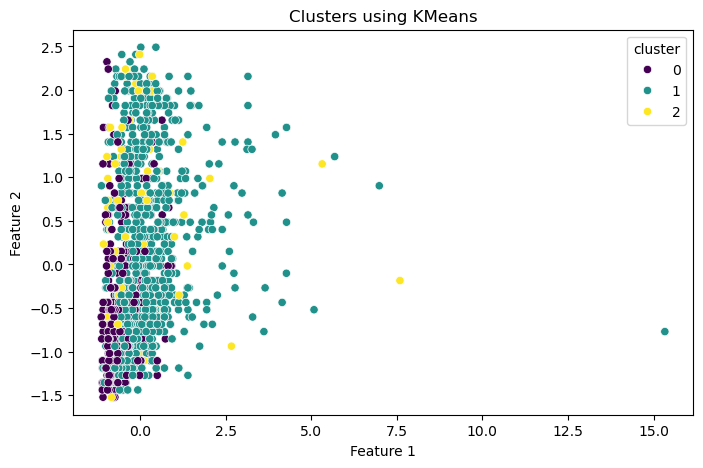

In [52]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=df['cluster'], palette='viridis')
plt.title("Clusters using KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [65]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

params = {
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10]
    },
    "SVM": {
        "C": [1, 10],
        "kernel": ['linear', 'rbf']
    },

    "Logistic Regression": {
        "C": [0.1, 1, 10]
    }
}


In [73]:
for name, model in models.items():
    print(f"\nRunning GridSearch for {name}...")
    grid = GridSearchCV(model, params[name], cv=3)
    grid.fit(X_train, y_train)
    
    print("Best parameters:", grid.best_params_)
    y_pred = grid.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Running GridSearch for Random Forest...
Best parameters: {'max_depth': None, 'n_estimators': 100}
Confusion Matrix:
 [[ 83   4   0]
 [  5 143   0]
 [  0   0  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        87
           1       0.97      0.97      0.97       148
           2       1.00      1.00      1.00        17

    accuracy                           0.96       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.96      0.96      0.96       252


Running GridSearch for SVM...
Best parameters: {'C': 10, 'kernel': 'linear'}
Confusion Matrix:
 [[ 85   2   0]
 [  2 146   0]
 [  0   0  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.99      0.99      0.99       148
           2       1.00      1.00      1.00        17

    accuracy                           0.98   